# <center><font size="16">Human Resource Analysis</font></center>

# Wrangling & EDA

## 1. Loading Packages

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

In [126]:
data=pd.read_csv('HR_comma_sep.csv')
df=data.copy()

In [127]:
df.shape

(14999, 10)

In [128]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [129]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [130]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [131]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

# 3. Exploration

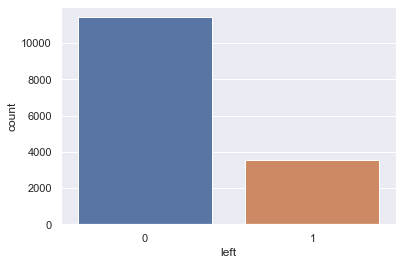

In [132]:
sns.countplot(x='left', data=df)
plt.show()

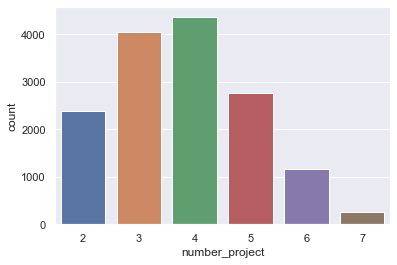

In [133]:
sns.countplot(x='number_project', data=df)
plt.show()

In [134]:
df2=df.groupby('number_project')['left']
df2.value_counts()

number_project  left
2               1       1567
                0        821
3               0       3983
                1         72
4               0       3956
                1        409
5               0       2149
                1        612
6               1        655
                0        519
7               1        256
Name: left, dtype: int64

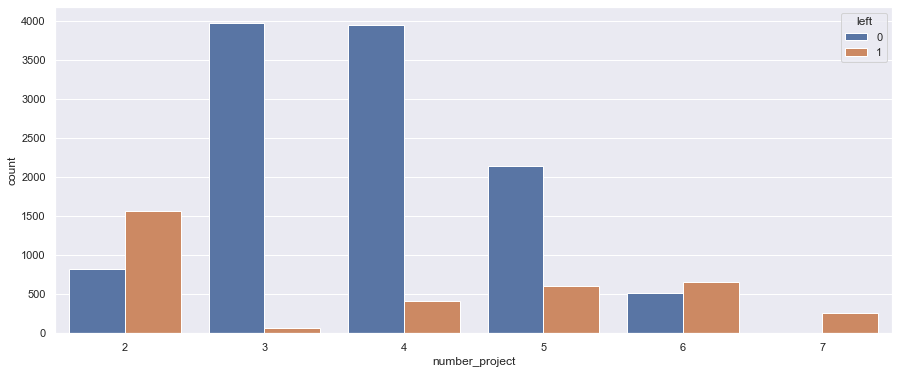

In [138]:
plt.figure(figsize=(15,6))
sns.countplot(x='number_project',hue='left',data=df)
plt.show()

## **Time spent at the company**

In [139]:
df3=df.groupby('time_spend_company')['left']
df3.value_counts()

time_spend_company  left
2                   0       3191
                    1         53
3                   0       4857
                    1       1586
4                   0       1667
                    1        890
5                   1        833
                    0        640
6                   0        509
                    1        209
7                   0        188
8                   0        162
10                  0        214
Name: left, dtype: int64

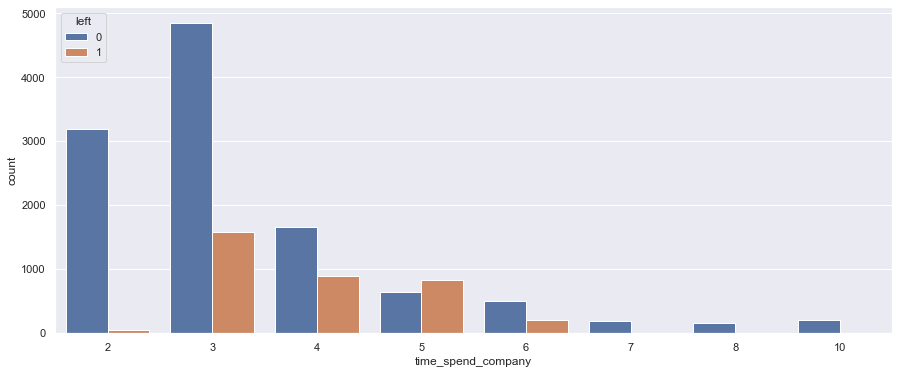

In [140]:
plt.figure(figsize=(15,6))
sns.countplot(x='time_spend_company',hue='left',data=df)
plt.show()

## **Employees engaged in any work accident**

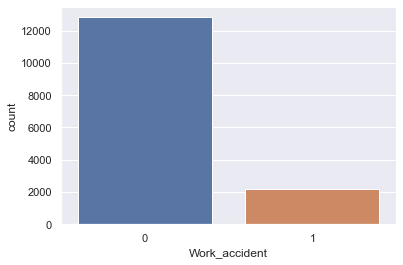

In [141]:
sns.countplot(x='Work_accident',data=df)
plt.show()

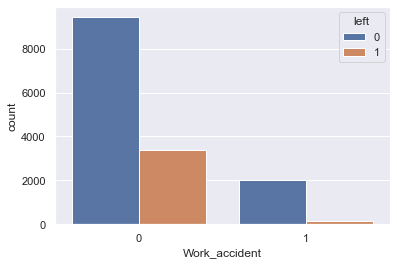

In [142]:
# Number of employees involved in work accident and left or not left
sns.countplot(x='Work_accident',hue='left',data=df)
plt.show()

## **Promotions in last 5 years**

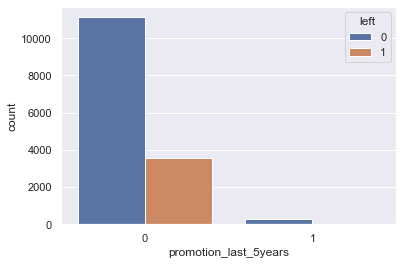

In [143]:
sns.countplot(x='promotion_last_5years',hue='left',data=df)
plt.show()

## **Salary trends**

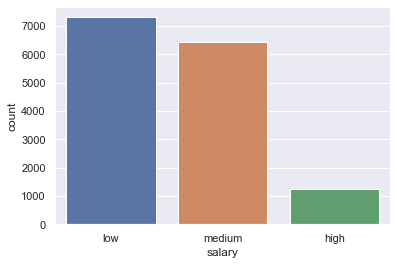

In [145]:
sns.countplot(x='salary',data=df)
plt.show()

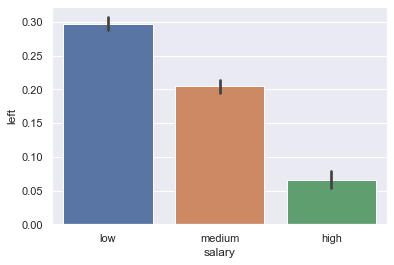

In [146]:
sns.barplot(x='salary',y='left',data=df)

## **Employees per Department**

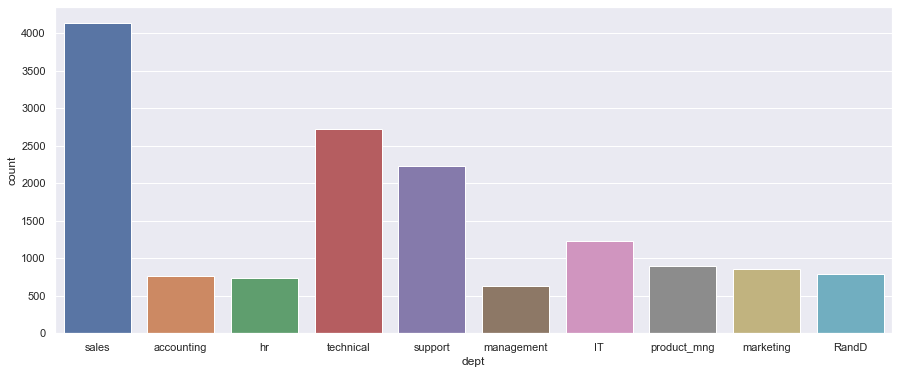

In [149]:
plt.figure(figsize=(15,6))
sns.countplot(x='dept',data=df)
plt.show()

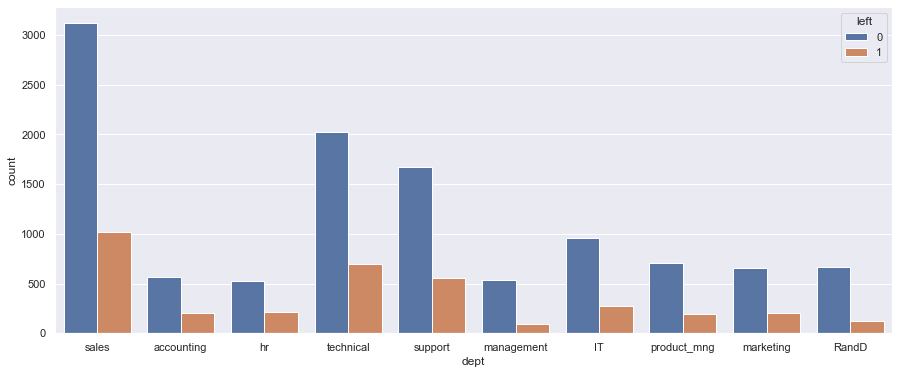

In [150]:
plt.figure(figsize=(15,6))
sns.countplot(x='dept',data=df,hue='left')
plt.show()

## **Satisfaction Level**

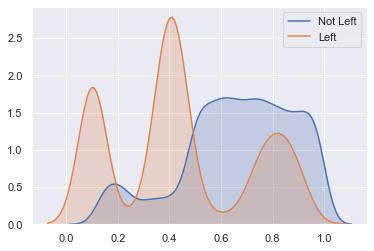

In [28]:
sns.kdeplot(df[df['left'] == 0]['satisfaction_level'], shade=True,label="Not Left");
sns.kdeplot(df[df['left'] == 1]['satisfaction_level'], shade=True,label="Left")
plt.show()

# Feature Engineering

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

In [29]:
df.loc[df['satisfaction_level']>=0.5,'satisfaction_level_type']="high"
df.loc[df['satisfaction_level']<0.5,'satisfaction_level_type']="low"
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium,high
2,0.11,0.88,7,272,4,0,1,0,sales,medium,low
3,0.72,0.87,5,223,5,0,1,0,sales,low,high
4,0.37,0.52,2,159,3,0,1,0,sales,low,low


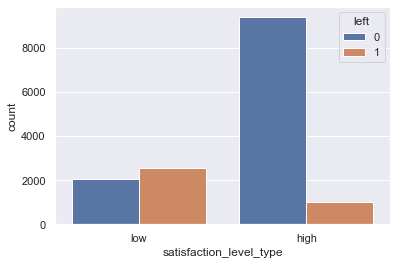

In [30]:
sns.countplot(x="satisfaction_level_type",data=df, hue='left')
plt.show()

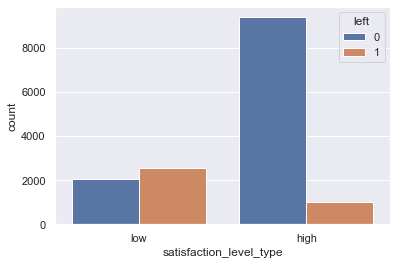

In [32]:
sns.countplot(x="satisfaction_level_type",data=df, hue='left')
plt.show()

In [160]:
df4=df.groupby('number_project')['satisfaction_level']
df4.value_counts()

number_project  satisfaction_level
2               0.37                  209
                0.43                  186
                0.40                  174
                0.44                  167
                0.45                  164
                                     ... 
7               0.14                    1
                0.15                    1
                0.21                    1
                0.51                    1
                0.66                    1
Name: satisfaction_level, Length: 467, dtype: int64

In [161]:
df.loc[df['number_project']==2,'employee_type']='unburdened'
df.loc[df['number_project'].between(3,5, inclusive = True) ,'employee_type']='Satisfaction'
df.loc[df['number_project']>=6,'employee_type']='Burdened'

In [162]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,employee_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,unburdened
1,0.80,0.86,5,262,6,0,1,0,sales,medium,Satisfaction
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Burdened
3,0.72,0.87,5,223,5,0,1,0,sales,low,Satisfaction
4,0.37,0.52,2,159,3,0,1,0,sales,low,unburdened


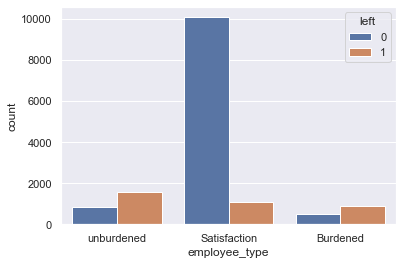

In [36]:
sns.countplot(x='employee_type', data=df, hue='left')
plt.show()

### Remove Redundant Features

In [37]:
df.drop(['number_project','satisfaction_level'],axis=1,inplace=True)
df.head()

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type,employee_type
0,0.53,157,3,0,1,0,sales,low,low,unburdened
1,0.86,262,6,0,1,0,sales,medium,high,Satisfaction
2,0.88,272,4,0,1,0,sales,medium,low,Burdened
3,0.87,223,5,0,1,0,sales,low,high,Satisfaction
4,0.52,159,3,0,1,0,sales,low,low,unburdened


# Machine Learning

In [38]:
onehot=pd.get_dummies(df, columns=['dept','salary','satisfaction_level_type','employee_type'])
onehot.head()

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_high,satisfaction_level_type_low,employee_type_Burdened,employee_type_Satisfaction,employee_type_unburdened
0,0.53,157,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.86,262,6,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0.88,272,4,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.87,223,5,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0.52,159,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [39]:
df=onehot.copy()
df.head()

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_high,satisfaction_level_type_low,employee_type_Burdened,employee_type_Satisfaction,employee_type_unburdened
0,0.53,157,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.86,262,6,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0.88,272,4,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.87,223,5,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0.52,159,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


## Creating Independant and Dependant Variables

In [40]:
X=df.drop('left',axis=1)
Y=df[['left']]


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.30, random_state=25, shuffle=True)


In [43]:
print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(10499, 23) (10499, 1)
(4500, 23) (4500, 1)


## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf_cl=RandomForestClassifier(random_state=10)
rf_cl.fit(x_train,y_train)

<ipython-input-45-20f3d5a523f5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_cl.fit(x_train,y_train)


RandomForestClassifier(random_state=10)

In [46]:
rf_pred=rf_cl.predict(x_test)
rf_pred[0:9]


array([0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

**Precision**

In [47]:
from sklearn.metrics import precision_score

In [48]:
rf_precion=precision_score(y_test,rf_pred)
print(rf_precion)

0.9727187206020697


**Accuracy**

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
rf_acc=accuracy_score(y_test,rf_pred)
print(rf_acc)

0.9815555555555555


**Recall**

In [51]:
from sklearn.metrics import recall_score

In [52]:
rf_recall=recall_score(y_test,rf_pred)
print(rf_recall)

0.9503676470588235


**F1-Score**

In [53]:
from sklearn.metrics import f1_score

In [54]:
rf_f1_score=f1_score(y_test,rf_pred)
print(rf_f1_score)

0.9614132961413296


**Classification Report**

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3412
           1       0.97      0.95      0.96      1088

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr=LogisticRegression(random_state=100)
lr.fit(x_train,y_train)

C:\Users\This\anaconda3\New folder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\This\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [59]:
lr_pred=lr.predict(x_test)
lr_pred[0:9]

array([0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

**Accuracy**

In [102]:
lr_accuracy=accuracy_score(y_test,lr_pred)
print(lr_accuracy)

0.8588888888888889


**Precision**

In [103]:
lr_precision=precision_score(y_test,lr_pred)
print(lr_precision)

0.7361835245046924


**Recall**

In [104]:
lr_recall=recall_score(y_test,lr_pred)
print(lr_recall)

0.6488970588235294


**F1 Score**

In [105]:
lr_f1_score=f1_score(y_test,lr_pred)
print(lr_f1_score)

0.6897899364924279


**Classification Report**

In [106]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3412
           1       0.74      0.65      0.69      1088

    accuracy                           0.86      4500
   macro avg       0.81      0.79      0.80      4500
weighted avg       0.85      0.86      0.86      4500



## Ada Boost

In [65]:
from sklearn.ensemble import AdaBoostClassifier

In [66]:
ada_b=AdaBoostClassifier(random_state=100)
ada_b.fit(x_train,y_train)
    

C:\Users\This\anaconda3\New folder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier(random_state=100)

In [67]:
pred_clf_adb=ada_b.predict(x_test)
pred_clf_adb[0:9]

array([0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

**Accuracy**

In [68]:
ab_accuracy=accuracy_score(y_test,pred_clf_adb)
print(ab_accuracy)

0.9226666666666666


**Precision**

In [69]:
ab_precision=precision_score(y_test,pred_clf_adb)
print(ab_precision)

0.8497164461247637


**Recall**

In [70]:
ab_recall=recall_score(y_test,pred_clf_adb)
print(ab_recall)

0.8262867647058824


**F1-Score**

In [71]:
ab_f1_score=f1_score(y_test,pred_clf_adb)
print(ab_f1_score)

0.8378378378378379


**Classification Report**

In [73]:
print(classification_report(y_test,pred_clf_adb))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3412
           1       0.85      0.83      0.84      1088

    accuracy                           0.92      4500
   macro avg       0.90      0.89      0.89      4500
weighted avg       0.92      0.92      0.92      4500



## XG Boost

In [77]:
!pip install xgboost

In [78]:
import xgboost as xbg

In [85]:
cl_xbg=xbg.XGBClassifier(seed=25, ntheard=1, random_state=100)
cl_xbg.fit(x_train,y_train)

[18:23:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { ntheard } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, ntheard=1, num_parallel_tree=1,
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=25, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [88]:
pred_clf_xgb=cl_xbg.predict(x_test)
pred_clf_xgb[0:9]


array([0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

**Accuracy**

In [89]:
xgb_accuracy=accuracy_score(y_test,pred_clf_xgb)
print(xgb_accuracy)

0.9773333333333334


**Precision**

In [90]:
xgb_precision=precision_score(y_test,pred_clf_xgb)
print(xgb_precision)

0.9607476635514018


**Recall**

In [91]:
xgb_recall=recall_score(y_test,pred_clf_xgb)
print(xgb_recall)

0.9448529411764706


**F1-Score**

In [92]:
xgb_f1_score=f1_score(y_test,pred_clf_xgb)
print(xgb_f1_score)

0.9527340129749768


**Classification Report**

In [93]:
print(classification_report(y_test,pred_clf_xgb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3412
           1       0.96      0.94      0.95      1088

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



# Result Comparisons

In [123]:
comparisons_dict={"Algorithm":["Random Forest","Logistic Regression","Ada Boost","XGboost"],
                  "Accuracy":[rf_acc,lr_accuracy,ab_accuracy,xgb_accuracy],
                  "Precision":[rf_precion,lr_precision,ab_precision,xgb_precision],
                  "Recall":[rf_recall,lr_recall,ab_recall,xgb_recall],
                  "F1_score":[rf_f1_score,lr_f1_score,ab_f1_score,xgb_f1_score]
    
}

In [124]:
comparison=pd.DataFrame(comparisons_dict)
comparison.sort_values(["Recall","Accuracy","F1_score","Precision"],ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1_score
0,Random Forest,0.981556,0.972719,0.950368,0.961413
3,XGboost,0.977333,0.960748,0.944853,0.952734
2,Ada Boost,0.922667,0.849716,0.826287,0.837838
1,Logistic Regression,0.858889,0.736184,0.648897,0.689790
